In [5]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Crazy Frog - Axel F (Official Video).csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 18389
                    user_id              username  \
0  UC4XR0EZ0oHwSV2XhhShzX5A            @crazyfrog   
1  UCyoZZ8DomH-T9a-Xycy9Yvg        @ahmednour6390   
2  UClozkZ5GVEL_JDfMCj71Asg           @dinihikayə   
3  UCC1UeqBhTpB--bWqskvf-zg  @SofiaToscanelli-m6o   
4  UCPero15FJ9yiJ2y-m3q9tpQ       @MrLivingLegend   

                                             comment  likes  replies  \
0                                   Back on track !!  73439      750   
1                               Don toliver be like:      0        0   
2                                               2024      1        0   
3                                      Ti amo tinti😂      0        0   
4  Those days of music just had a whole different...      0        0   

                   date                                     video  \
0  2023-11-30T11:38:47Z  Crazy Frog - Axel F (Official Video).csv   
1  2024-10-20T17:25:48Z  Crazy Frog - Axel F (Offi

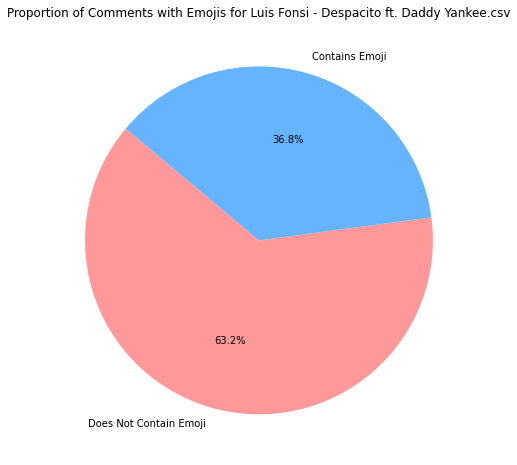

In [6]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [7]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-7-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
3,UCC1UeqBhTpB--bWqskvf-zg,@SofiaToscanelli-m6o,Ti amo tinti😂,0,0,2024-10-20T17:14:25Z,Crazy Frog - Axel F (Official Video).csv,True,1
6,UCfuqq4zqt77l0L7OBY1MZOw,@ChaimaMarzouki-d1z,❤❤❤❤❤❤I Love You 👏👏👏👏,0,0,2024-10-20T17:09:23Z,Crazy Frog - Axel F (Official Video).csv,True,2
11,UCcsrGryINIfJSQvEQr_Z0Sw,@NovoJ6plus,😂😂😂😂😂,0,0,2024-10-20T16:28:19Z,Crazy Frog - Axel F (Official Video).csv,True,1
12,UC62pmF-1wy4keu7NzLQXC5A,@Колятвснимаетвс17,😂,1,0,2024-10-20T16:23:42Z,Crazy Frog - Axel F (Official Video).csv,True,1
15,UCrWox4XBSi2lB5R81R96oUQ,@spaceyjacey_,Brings back so many memories 🩷🩷❤️❤️❤️,1,0,2024-10-20T16:02:01Z,Crazy Frog - Axel F (Official Video).csv,True,1
...,...,...,...,...,...,...,...,...,...
49979,UC7p3LTmdiil0xuGvlU6dBIg,@parisefearn5760,😆,0,0,2023-04-11T07:12:32Z,Crazy Frog - Axel F (Official Video).csv,True,1
49987,UCntxSlpPl1_mzbPmiytSfoA,@Dkanaeru,Kobo kanaeru ☔ 😂 😎,2,0,2023-04-11T02:27:59Z,Crazy Frog - Axel F (Official Video).csv,True,3
49988,UCQJWGogJ7sjtFCmYDuNcwsg,@Classicloud01,Legend seen 2023😅😅,0,0,2023-04-11T01:22:59Z,Crazy Frog - Axel F (Official Video).csv,True,1
49991,UCmx5fEuwk7mU5sVfEwFlMWQ,@Jezar157,"En efecto, es cine 🚬🗿",0,0,2023-04-10T22:58:23Z,Crazy Frog - Axel F (Official Video).csv,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Crazy Frog - Axel F (Official Video).csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 4: Detected language: lt
Row 4: Original: Ti amo tinti😂, Translated: I love you dyed 😂
Row 4 saved.
Row 7: Detected language: en
Row 7: Original: ❤❤❤❤❤❤I Love You 👏👏👏👏, Translated: I Love You ❤❤❤❤❤❤👏👏👏👏
Row 7 saved.
Row 12: Text contains only emojis or is empty: 😂😂😂😂😂
Row 12 saved.
Row 13: Text contains only emojis or is empty: 😂
Row 13 saved.
Row 16: Detected language: en
Row 16: Original: Brings back so many memories 🩷🩷❤️❤️❤️, Translated: Brings back so many memories 🩷🩷 ❤️❤️❤️
Row 16 saved.
Row 18: Text contains only emojis or is empty: 🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇻🇹🇭🇹🇭🇹🇭🇹🇭🇹🇭🇹🇭🇹🇭🇹🇫🇹🇷🇹🇴🇺🇬🇺🇦🇹🇲🔥🔥🔥🔥🔥🔥🔥🔥
Row 18 saved.
Row 21: Detected language: de
Row 21: Original: 5B💀☠💀☠☠💀?, Translated: 5B? 💀☠💀☠☠💀
Row 21 saved.
Row 22: Detected language: ar
Row 22: Original: نبمد ‏‪1:06‬‏ مرذدتد ‏‪1:06‬‏ ‏‪1:06‬‏ ‏‪1:06‬‏ ‏‪1:06‬‏ ‏‪1:06‬‏ اجيتيابلييكيزبزباببعذيباططبرزذ😊ذززرنرززرة زوزد ‏‪1:06‬‏ اانتال❤زبميريكبنقر😊ابمببر ‏‪1:06‬‏ ةبنبك, Translated: 1:06 PM 1:06 PM 1:06 PM 1:06 PM 1:06 PM 1:06 PM 😊❤😊
Row 22 s

Row 155: Original: Өте😂😂😂😂😂😂😂😂😂😂😂😂😂😂😅😅😅😅😅😅😅😅😅😊😊😊😊😊😊😊😊😊😊😊😊😊😂😂😂😂😂😂😂😂😂😂, Translated: Very 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😅😅😅😅😅😅😅😅😅😊😊😊😊😊😊😊😊😊😊😊😊😊😂😂😂😂😂😂😂😂😂😂
Row 155 saved.
Row 163: Detected language: tl
Row 163: Original: Very  bad  song. 
😢, Translated: Very  bad  song. 😢
Row 163 saved.
Row 169: Text contains only emojis or is empty: 왜도망가
Row 169 saved.
Row 171: Detected language: nl
Row 171: Original: Jseš dement 
😊😊😊😊😊😅, Translated: You are demented. 😊😊😊😊😊😅
Row 171 saved.
Row 173: Text contains only emojis or is empty: 🎉
Row 173 saved.
Row 174: Detected language: en
Row 174: Original: I am here ❤❤❤❤, Translated: I am here ❤❤❤❤
Row 174 saved.
Row 176: Detected language: uk
Row 176: Original: Узб салом🇸🇱😊, Translated: Hello Uzb 🇸🇱😊
Row 176 saved.
Row 179: Error translating text: 20幾年前的搖滾樂, Error: No features in text.
Row 179 saved.
Row 180: Detected language: de
Row 180: Original: Viein A.  CASAMIA❤ VIAMDND, Translated: I took A. CASAMI VIAMDND ❤
Row 180 saved.
Row 182: Detected language: pt
Row 182: Origin

Row 291: Original: Nostalgia 💫, Translated: Nostalgia 💫
Row 291 saved.
Row 292: Detected language: en
Row 292: Original: Who's whatching this in october 2024
👇, Translated: Who's whatching this in october 2024 👇
Row 292 saved.
Row 293: Error translating text: 2024❤🎉, Error: No features in text.
Row 293 saved.
Row 294: Text contains only emojis or is empty: ㅋ
Row 294 saved.
Row 296: Detected language: af
Row 296: Original: 🎉🎉🎉ding ding😂😂, Translated: ding ding 🎉🎉🎉😂😂
Row 296 saved.
Row 299: Detected language: en
Row 299: Original: Yes I Monkey😊😊😊🎉, Translated: Yes I Monkey 😊😊😊🎉
Row 299 saved.
Row 300: Detected language: en
Row 300: Original: It was my Childhood favourite song 😂😂😂, Translated: It was my Childhood favourite song 😂😂😂
Row 300 saved.
Row 301: Detected language: hu
Row 301: Original: MJIKA😢 0:17, Translated: WORLD 0:17 😢
Row 301 saved.
Row 303: Text contains only emojis or is empty: 😂
Row 303 saved.
Row 307: Detected language: en
Row 307: Original: Who is 2024❤❤❤, Translated: 

Row 397: Error translating text: 15 years ago omagat 😮, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 397 saved.
Row 398: Detected language: th
Row 398: Error translating text: จะเจอคนไทยมาเม้นไหมว่ะ😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 398 saved.
Row 399: Text contains only emojis or is empty: 😮😅😅😅😅😀💙💙💙💙💙💙💙💙💙💙💙💙
Row 399 saved.
Row 400: Error translating text: 2024❤, Error: No features in text.
Row 400 saved.
Row 406: Error translating text: 😊😊😊😊😊😊🦹🦹🦹🤔🤐👹☠️💀👾👽🤖🦠🦹🦸🌡️🌫️🔥🌋🏜️, Error: No features in text.
Row 406 saved.
Row 409: Detected language: cy
Row 409: Error translating text: Dddfueudueuud🎉,

Row 478: Error translating text: i'm back in 2024💔, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 478 saved.
Row 479: Detected language: en
Row 479: Original: The song 🗿 the music 🗿 the frog 🗿 the villain 🗿 the viewers 🗿 everything 🗿, Translated: The song  the music  the frog  the villain  the viewers  everything 🗿🗿🗿🗿🗿🗿
Row 479 saved.
Row 480: Detected language: sq
Row 480: Error translating text: Vhhhbhhjhjjuhjvvhig .vjb h😮ghhchhzhu ufuru4euidiri3uiefituiti57tufu8t cjd2rht k3j3 ok e ff m rjp 0:26  j
Z, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 480 saved.
Row 481: Text contains only emojis or is emp

Row 559: Error translating text: 1:38 1:39 1:39 1:39 1:39 1:39 1:40 1:40 1:40 1:40 1:40 1:40 1:41 1:41 1:41 1:41 1:41 1:41 1:42 1:42 1:42 mau jadi youtuber aku ☠️☠️🔥🤐 aku disayang oleh, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 559 saved.
Row 561: Detected language: en
Row 561: Original: Bro its so funny but i may be a good dumb man because my brother was dancing to it and hit my head😂😂😂, Translated: Bro its so funny but i may be a good dumb man because my brother was dancing to it and hit my head 😂😂😂
Row 561 saved.
Row 563: Text contains only emojis or is empty: 意味わからん
Row 563 saved.
Row 565: Detected language: sq
Row 565: Error translating text: jkbvhjhghfvuhifduihfvh😂😂😂😂🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make

Row 641: Error translating text: fgmgbaaaaaaa😊, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 641 saved.
Row 650: Detected language: it
Row 650: Error translating text: ❤ilu🎉❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 650 saved.
Row 651: Detected language: ar
Row 651: Error translating text: ليش بس اني عربي ☹️, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 651 saved.
Row 654: Detected language: th
Row 654: 